In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

from sklearn.utils import resample
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report, roc_auc_score, roc_curve
from sklearn.model_selection import cross_val_score
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.preprocessing import Normalizer
from sklearn import preprocessing
from sklearn.decomposition import PCA

In [2]:
data = pd.read_csv('./diabetes_binary_health_indicators_BRFSS2015.csv')

data.dropna(inplace=True)

In [3]:
data.head()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


In [4]:
print(data.dtypes)
print(len(data))

Diabetes_binary         float64
HighBP                  float64
HighChol                float64
CholCheck               float64
BMI                     float64
Smoker                  float64
Stroke                  float64
HeartDiseaseorAttack    float64
PhysActivity            float64
Fruits                  float64
Veggies                 float64
HvyAlcoholConsump       float64
AnyHealthcare           float64
NoDocbcCost             float64
GenHlth                 float64
MentHlth                float64
PhysHlth                float64
DiffWalk                float64
Sex                     float64
Age                     float64
Education               float64
Income                  float64
dtype: object
253680


In [5]:
data.isnull().sum()*100/len(data)

Diabetes_binary         0.0
HighBP                  0.0
HighChol                0.0
CholCheck               0.0
BMI                     0.0
Smoker                  0.0
Stroke                  0.0
HeartDiseaseorAttack    0.0
PhysActivity            0.0
Fruits                  0.0
Veggies                 0.0
HvyAlcoholConsump       0.0
AnyHealthcare           0.0
NoDocbcCost             0.0
GenHlth                 0.0
MentHlth                0.0
PhysHlth                0.0
DiffWalk                0.0
Sex                     0.0
Age                     0.0
Education               0.0
Income                  0.0
dtype: float64

<Axes: >

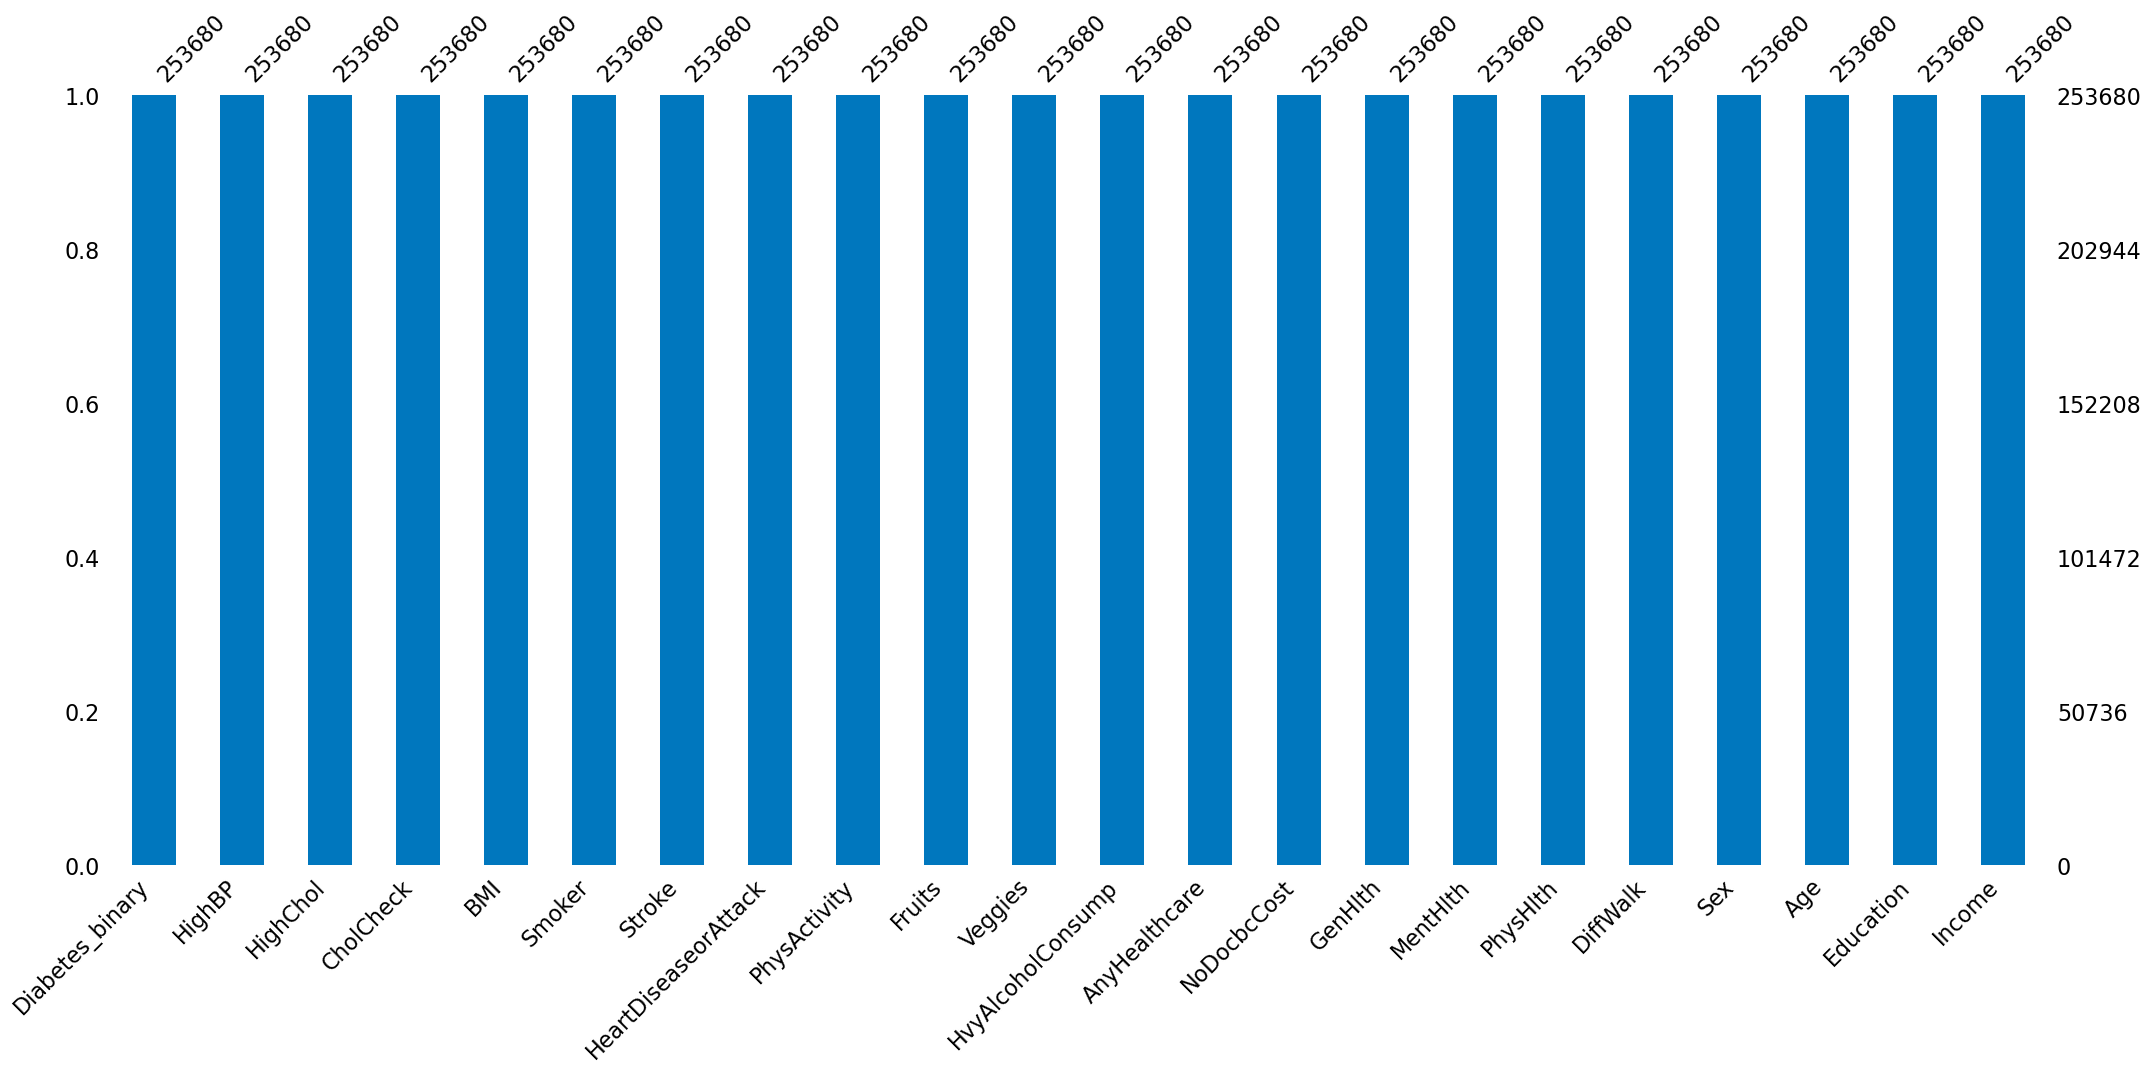

In [6]:
msno.bar(data, color="#0077be")

In [7]:
x = data[['HighBP','HighChol','CholCheck','BMI','Smoker','Stroke','HeartDiseaseorAttack','PhysActivity','Fruits','Veggies','HvyAlcoholConsump','AnyHealthcare','NoDocbcCost','GenHlth','MentHlth','PhysHlth','DiffWalk','Sex','Age','Education','Income']]
y = data['Diabetes_binary']

In [8]:
print(x)
len(x)

        HighBP  HighChol  CholCheck   BMI  Smoker  Stroke  \
0          1.0       1.0        1.0  40.0     1.0     0.0   
1          0.0       0.0        0.0  25.0     1.0     0.0   
2          1.0       1.0        1.0  28.0     0.0     0.0   
3          1.0       0.0        1.0  27.0     0.0     0.0   
4          1.0       1.0        1.0  24.0     0.0     0.0   
...        ...       ...        ...   ...     ...     ...   
253675     1.0       1.0        1.0  45.0     0.0     0.0   
253676     1.0       1.0        1.0  18.0     0.0     0.0   
253677     0.0       0.0        1.0  28.0     0.0     0.0   
253678     1.0       0.0        1.0  23.0     0.0     0.0   
253679     1.0       1.0        1.0  25.0     0.0     0.0   

        HeartDiseaseorAttack  PhysActivity  Fruits  Veggies  ...  \
0                        0.0           0.0     0.0      1.0  ...   
1                        0.0           1.0     0.0      0.0  ...   
2                        0.0           0.0     1.0      0.0  ..

253680

In [9]:
print(y)
len(y)

0         0.0
1         0.0
2         0.0
3         0.0
4         0.0
         ... 
253675    0.0
253676    1.0
253677    0.0
253678    0.0
253679    1.0
Name: Diabetes_binary, Length: 253680, dtype: float64


253680

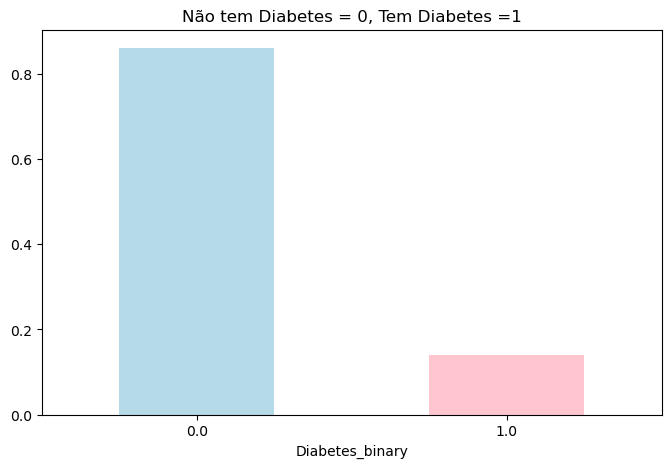

In [10]:
fig = plt.figure(figsize = (8,5))
data.Diabetes_binary.value_counts(normalize = True).plot(kind='bar', color= ['lightblue','pink'], alpha = 0.9, rot=0)
plt.title('Não tem Diabetes = 0, Tem Diabetes =1')
plt.show()

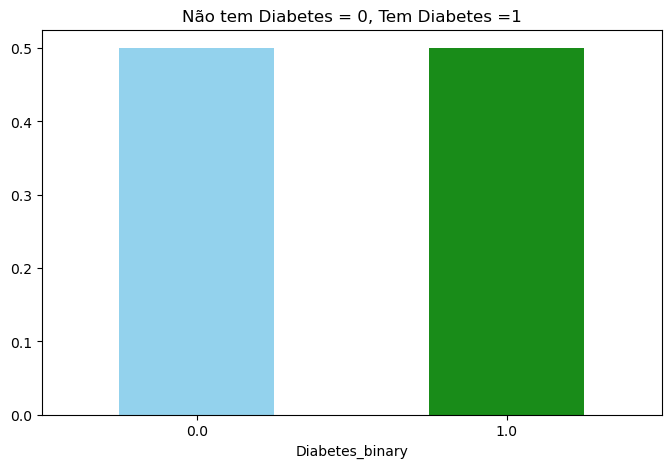

In [11]:
no = data[data.Diabetes_binary == 0]
yes = data[data.Diabetes_binary == 1]
yes_oversampled = resample(yes, replace=True, n_samples=len(no), random_state=123)
oversampled = pd.concat([no, yes_oversampled])

fig = plt.figure(figsize = (8,5))
oversampled.Diabetes_binary.value_counts(normalize = True).plot(kind='bar', color= ['skyblue','green'], alpha = 0.9, rot=0)
plt.title('Não tem Diabetes = 0, Tem Diabetes =1')
plt.show()

In [12]:
X = oversampled.drop(["Diabetes_binary"], axis=1)
Y = oversampled["Diabetes_binary"]

In [13]:
print(X)
len(X)

        HighBP  HighChol  CholCheck   BMI  Smoker  Stroke  \
0          1.0       1.0        1.0  40.0     1.0     0.0   
1          0.0       0.0        0.0  25.0     1.0     0.0   
2          1.0       1.0        1.0  28.0     0.0     0.0   
3          1.0       0.0        1.0  27.0     0.0     0.0   
4          1.0       1.0        1.0  24.0     0.0     0.0   
...        ...       ...        ...   ...     ...     ...   
14196      0.0       0.0        1.0  28.0     1.0     0.0   
90404      0.0       1.0        1.0  36.0     0.0     0.0   
68894      1.0       0.0        0.0  34.0     1.0     0.0   
41956      1.0       0.0        1.0  43.0     1.0     0.0   
200686     1.0       1.0        1.0  25.0     1.0     0.0   

        HeartDiseaseorAttack  PhysActivity  Fruits  Veggies  ...  \
0                        0.0           0.0     0.0      1.0  ...   
1                        0.0           1.0     0.0      0.0  ...   
2                        0.0           0.0     1.0      0.0  ..

436668

In [14]:
print(Y)
len(Y)

0         0.0
1         0.0
2         0.0
3         0.0
4         0.0
         ... 
14196     1.0
90404     1.0
68894     1.0
41956     1.0
200686    1.0
Name: Diabetes_binary, Length: 436668, dtype: float64


436668

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size =0.2, stratify = Y, random_state = 0)

x_train_new, x_test_new, y_train_new, y_test_new = train_test_split(x,y, test_size =0.2, stratify = y, random_state = 0)

In [17]:
X_train.dtypes

HighBP                  float64
HighChol                float64
CholCheck               float64
BMI                     float64
Smoker                  float64
Stroke                  float64
HeartDiseaseorAttack    float64
PhysActivity            float64
Fruits                  float64
Veggies                 float64
HvyAlcoholConsump       float64
AnyHealthcare           float64
NoDocbcCost             float64
GenHlth                 float64
MentHlth                float64
PhysHlth                float64
DiffWalk                float64
Sex                     float64
Age                     float64
Education               float64
Income                  float64
dtype: object

In [18]:
y_train.dtypes

dtype('float64')

In [19]:
print(len(X_train))
print(len(X_test))
print(len(X_train)/len(X))
#print(len(X_train)/len(X))

349334
87334
0.7999990839722627


In [20]:
pca = PCA(n_components=0.72)
pca.fit(X)

PCA(n_components=0.72)

In [21]:
Z = pca.transform(X)
Z

array([[ 16.99770162,   4.95384126],
       [ -7.35522106,  -3.24790547],
       [ 33.03895747, -10.67426224],
       ...,
       [ 19.55675316,   4.46852793],
       [ -2.68912868,  13.68866043],
       [ -3.15468159,  -3.35417302]])

In [22]:
Z.mean(axis=0)

array([-3.76401658e-14, -1.68562674e-14])

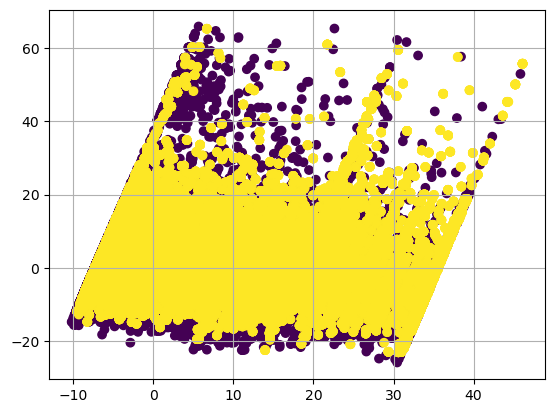

In [23]:
plt.scatter(Z[:,0],Z[:,1],c=Y)
#plt.scatter(Z[:,0],Z[:,1],c=y)
plt.grid()

In [24]:
Z_train, Z_test, yz_train, yz_test = train_test_split(Z,Y, test_size =0.2, stratify = Y, random_state = 0)

In [25]:
pca_new = PCA(n_components=0.95)
pca_new.fit(X)

PCA(n_components=0.95)

In [26]:
Z_new = pca_new.transform(X)
Z_new

array([[ 16.99770162,   4.95384126,   9.32034761,  -1.54299566],
       [ -7.35522106,  -3.24790547,  -1.03289068,   0.46824931],
       [ 33.03895747, -10.67426224,   8.12688171,   0.14121299],
       ...,
       [ 19.55675316,   4.46852793, -14.4458663 ,   3.06793587],
       [ -2.68912868,  13.68866043,   2.03705985,  -3.25274776],
       [ -3.15468159,  -3.35417302,  -4.12421   ,  -3.55521132]])

In [27]:
Z_new.mean(axis=0)

array([-3.76405563e-14, -1.63621787e-14,  5.29886983e-16,  5.29378282e-15])

In [28]:
Z_train_new, Z_test_new, yz_train_new, yz_test_new = train_test_split(Z_new,Y, test_size =0.2, stratify = Y, random_state = 0)

In [29]:
scaler = StandardScaler()
x_train_standard = scaler.fit_transform(X_train)
x_test_standard = scaler.transform(X_test)

scaler = StandardScaler()
x_train_standard_new = scaler.fit_transform(x_train_new)
x_test_standard_new = scaler.transform(x_test_new)

scaler = StandardScaler()
x_train_standard_z = scaler.fit_transform(Z_train)
x_test_standard_z = scaler.transform(Z_test)

scaler = StandardScaler()
x_train_standard_z_new = scaler.fit_transform(Z_train_new)
x_test_standard_z_new = scaler.transform(Z_test_new)

In [30]:
model_1 = LogisticRegression()
model_1.fit(x_train_standard, y_train)
y_pred_1 = model_1.predict(x_test_standard_new)
#y_pred_1 = model_1.predict(x_test_new)
#y_pred_1t = model_1.predict(x_train_standard_new)

model_2 = LinearSVC(C=1, loss = 'hinge', max_iter=500000)
model_2.fit(x_train_standard, y_train)  
y_pred_2 = model_2.predict(x_test_standard_new)
#y_pred_2 = model_2.predict(x_test_new)
#y_pred_2t = model_2.predict(x_train_standard_new)

model_3 = Pipeline((("poly_features", PolynomialFeatures(degree=3, include_bias=False)), ("log_reg", LogisticRegression(penalty=None, max_iter= 1000))),).fit(x_train_standard_z_new, yz_train_new)
y_pred_3 = model_3.predict(x_test_standard_z_new)
#y_pred_3 = model_3.predict(Z_test_new)
#y_pred_3t = model_3.predict(x_train_standard_z_new)

#model_4 = Pipeline((("poly_features", PolynomialFeatures(degree=3, include_bias=False)), ("poli_SVM", (LinearSVC(C=1, max_iter=50000)))),).fit(x_train_standard_z_new, yz_train_new)
#y_pred_4 = model_4.predict(x_test_standard_z_new)
#y_pred_4 = model_4.predict(Z_test_new)
#y_pred_4_4t = model_4.predict(x_train_standard_z_new)

model_5 = Pipeline((("poly_features", PolynomialFeatures(degree=3, include_bias=False)), ("log_reg_PCA", LogisticRegression(penalty=None, max_iter= 1000))),).fit(x_train_standard_z, yz_train)
y_pred_5 = model_5.predict(x_test_standard_z)
y_pred_5 = model_5.predict(Z_test_new)
#y_pred_5t = model_3.predict(x_train_standard_new)

c:\Users\Claudia\anaconda3\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


In [31]:
#model_3 = Pipeline((("poly_features", PolynomialFeatures(degree=3, include_bias=False)), ("log_reg", LogisticRegression(penalty=None, max_iter= 100))),).fit(x_train_standard_z_new, yz_train_new)
#y_pred_3 = model_3.predict(x_test_standard_z_new)
#y_pred_3 = model_3.predict(x_train_standard_z_new)

#model_4 = Pipeline((("poly_features", PolynomialFeatures(degree=3, include_bias=False)), ("poli_SVM", (LinearSVC(C=1, max_iter=50000)))),).fit(x_train_standard_z_new, yz_train_new)
#y_pred_4 = model_4.predict(x_test_standard_z_new)
#y_pred_4 = model_4.predict(x_train_standard_z_new)

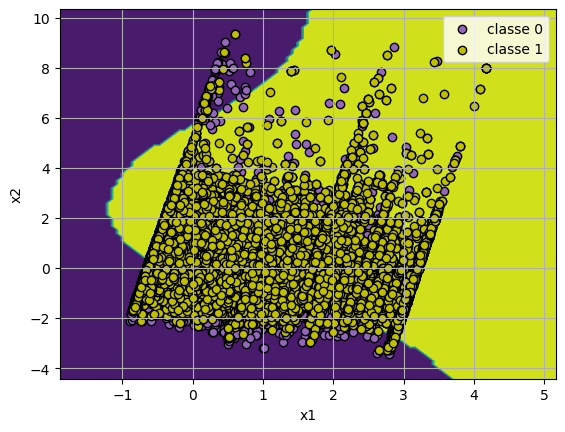

In [32]:
disp_1 = DecisionBoundaryDisplay.from_estimator(model_5,x_test_standard_z,response_method="predict",alpha=1)
disp_1.ax_.scatter(x_test_standard_z[yz_test==0,0],x_test_standard_z[yz_test==0,1],c='tab:purple',label="classe 0",edgecolor="k")
disp_1.ax_.scatter(x_test_standard_z[yz_test==1,0],x_test_standard_z[yz_test==1,1],c='y',label="classe 1",edgecolor="k")
disp_1.ax_.legend()
plt.xlabel("x1")
plt.ylabel("x2")
disp_1.ax_.grid()

Confusion Matrix:
[[25548 18119]
 [  838  6231]]
Accuracy: 62.64%


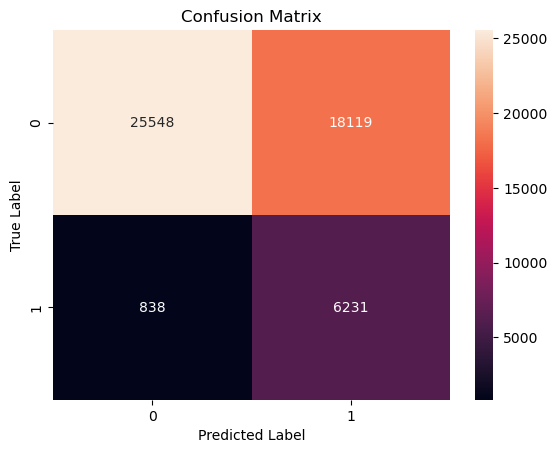

In [33]:
cm = confusion_matrix(y_test_new, y_pred_1)
acc_reg_test = accuracy_score(y_test_new, y_pred_1)
print("Confusion Matrix:")
print(cm)
print("Accuracy: {:.2f}%".format(acc_reg_test * 100))


sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

Confusion Matrix:
[[24598 19069]
 [  755  6314]]
Accuracy: 60.93%


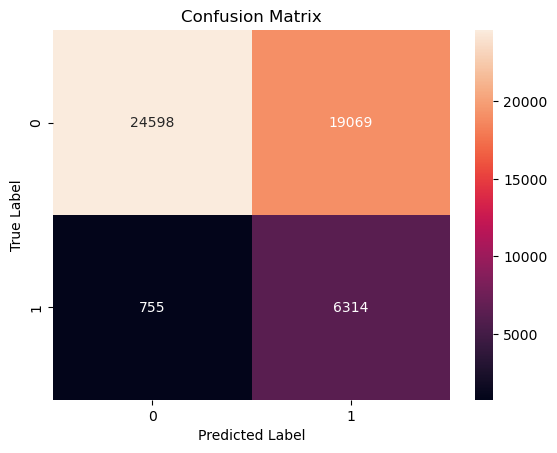

In [34]:
cm = confusion_matrix(y_test_new, y_pred_2)
acc_reg_test = accuracy_score(y_test_new, y_pred_2)
print("Confusion Matrix:")
print(cm)
print("Accuracy: {:.2f}%".format(acc_reg_test * 100))


sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

Confusion Matrix:
[[29069 14598]
 [10908 32759]]
Accuracy: 70.79%


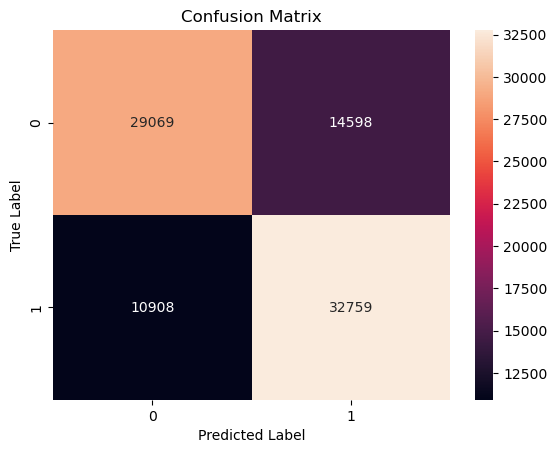

In [35]:
cm = confusion_matrix(yz_test_new, y_pred_3)
acc_reg_test = accuracy_score(yz_test_new, y_pred_3)
print("Confusion Matrix:")
print(cm)
print("Accuracy: {:.2f}%".format(acc_reg_test * 100))


sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [36]:
cm = confusion_matrix(yz_test_new, y_pred_4)
acc_reg_test = accuracy_score(yz_test_new, y_pred_4)
print("Confusion Matrix:")
print(cm)
print("Accuracy: {:.2f}%".format(acc_reg_test * 100))


sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

NameError: name 'y_pred_4' is not defined

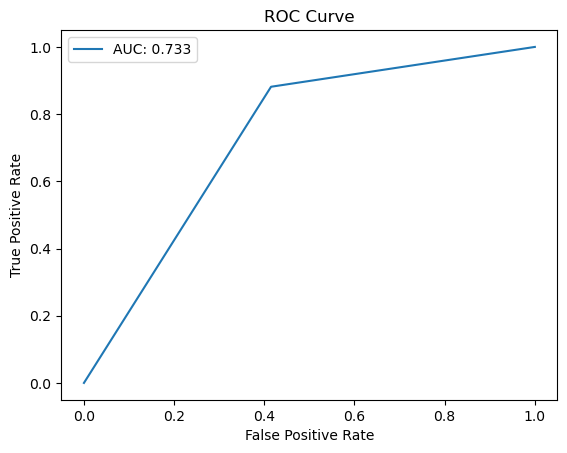

In [37]:
fpr, tpr, thresholds = roc_curve(y_test_new, y_pred_1)
auc = roc_auc_score(y_test_new, y_pred_1)

plt.plot(fpr, tpr, label='AUC: {:.3f}'.format(auc))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

In [38]:
accuracy = accuracy_score(y_test_new, y_pred_1)
#accuracy_0 = accuracy_score(y_train_new, y_pred_1)
print(f'Accuracy: {accuracy}')

# Generate a classification report
report = classification_report(y_test_new, y_pred_1)
#report_0 = classification_report(y_train_new, y_pred_1)
print(report)

Accuracy: 0.6263599810785241
              precision    recall  f1-score   support

         0.0       0.97      0.59      0.73     43667
         1.0       0.26      0.88      0.40      7069

    accuracy                           0.63     50736
   macro avg       0.61      0.73      0.56     50736
weighted avg       0.87      0.63      0.68     50736



In [40]:
accuracy = accuracy_score(y_test_new, y_pred_2)
#accuracy_0 = accuracy_score(y_train_new, y_pred_2)
print(f'Accuracy: {accuracy}')

# Generate a classification report
report = classification_report(y_test_new, y_pred_2)
#report_0 = classification_report(y_train_new, y_pred_2)
print(report)

Accuracy: 0.609271523178808
              precision    recall  f1-score   support

         0.0       0.97      0.56      0.71     43667
         1.0       0.25      0.89      0.39      7069

    accuracy                           0.61     50736
   macro avg       0.61      0.73      0.55     50736
weighted avg       0.87      0.61      0.67     50736



In [41]:
accuracy = accuracy_score(yz_test_new, y_pred_3)
#accuracy_0 = accuracy_score(yz_train_new, y_pred_3)
print(f'Accuracy: {accuracy}')

# Generate a classification report
report = classification_report(yz_test_new, y_pred_3)
#report_0 = classification_report(yz_train_new, y_pred_3)
print(report)

Accuracy: 0.7079487942840131
              precision    recall  f1-score   support

         0.0       0.73      0.67      0.70     43667
         1.0       0.69      0.75      0.72     43667

    accuracy                           0.71     87334
   macro avg       0.71      0.71      0.71     87334
weighted avg       0.71      0.71      0.71     87334



In [ ]:
accuracy = accuracy_score(yz_test_new, y_pred_4)
#accuracy_0 = accuracy_score(yz_train_new, y_pred_4)
print(f'Accuracy: {accuracy}')

# Generate a classification report
report = classification_report(yz_test_new, y_pred_4)
#report_0 = classification_report(yz_train_new, y_pred_4)
print(report)